## **DESENVOLVA UM CLASSIFICADOR**

Dado os resultados obtidos, por meio da métrica RMSE, analisou-se que o modelo de previsão que melhor se ajustou ao projeto é o modelo de KNN-Vizinhos, principalmente quando o número de vizinhos é menor. Logo, opta-se por desenvolvimento de um classificador do tipo KNN-Vizinhos.
Inicialmente, realiza-se a coleta de dados e posteriormente, aplica-se o metódo de classificação.

### **COLETA DE DADOS**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree, utils, preprocessing
from itertools import product
from matplotlib import pyplot as plt

In [2]:
#Dados do Cerrado Brasileiro, armazenados mensalmente via .csv
arquivos = ['janeiro.csv','fev.csv','marco.csv','abril.csv','maio.csv','junho.csv','julho.csv']

In [3]:
def read_csv(list_of_files):
    dfs = []
    for x in list_of_files:
        file = pd.read_csv(x, sep=',')
        dfs.append(file)
    df = pd.concat(dfs).reset_index(drop=True)
        
    return df

In [4]:
meses = read_csv(arquivos)

In [5]:
#Dados trabalhados para a eliminação de NaN nas colunas e identificação dos tipos de dados
meses.convert_dtypes()
meses.dropna(how='any', inplace=True)

In [6]:
meses.drop(columns=['Unnamed: 0','estado', 'satelite', 'municipio', 'pais', 'municipio_id', 'estado_id', 'pais_id', 'bioma', 'data_hora_gmt'], axis = 1, inplace=True)

In [7]:
meses_fogo = meses['risco_fogo'] > 0
meses = meses[meses_fogo]

In [8]:
meses = meses.reset_index()
del meses['index']
display(meses)

,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
0,-12.314859,-43.234066,9.0,2.7,1.0
1,-20.227880,-46.415940,8.0,0.0,0.3
2,-20.229250,-46.426820,8.0,0.0,0.3
3,-20.238930,-46.425510,8.0,0.0,0.4
4,-20.237550,-46.414600,8.0,0.0,0.4
...,...,...,...,...,...
265136,-6.360000,-45.670000,46.0,0.0,1.0
265137,-6.360000,-45.690000,46.0,0.0,1.0
265138,-6.400000,-44.140000,34.0,0.0,1.0
265139,-6.350000,-45.670000,46.0,0.0,1.0


In [9]:
TAMANHO_TESTE = 0.1 # fração de dados utilizada para teste: 10%
SEMENTE_ALEATORIA = 61455 # semente escolhida aleatoriamente
DATASET_NAME = "meses"
FEATURES = ["numero_dias_sem_chuva", "precipitacao", "lat", "lon"]
TARGET = ["risco_fogo"]

indices = meses.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

meses_treino = meses.loc[indices_treino]
meses_teste = meses.loc[indices_teste]

X_treino = meses_treino.reindex(FEATURES, axis=1).values
y_treino = meses_treino.reindex(TARGET, axis=1).values
X_teste = meses_teste.reindex(FEATURES, axis=1).values
y_teste = meses_teste.reindex(TARGET, axis=1).values

## **CLASSIFICADOR KNN**

**Criação de Dados Categóricos**

<p align="justify"> Criação de Dados Categóricos, responsáveis pela classificação dos dados do target. Desenvolve-se sete categorias de indice de risco de fogo, as quais são: </p>
<li> Risco Baixo (Risco_Fogo: 0.0 - 0.2) </li>
<li> Risco Baixo-Médio (Risco_Fogo: 0.2 - 0.4) </li>
<li> Risco Médio (Risco_Fogo: 0.5 - 0.6) </li>
<li> Risco Médio-Alto (Risco_Fogo: 0.7) </li>
<li> Risco Alto I (Risco_Fogo: 0.8) </li>
<li> Risco Alto II (Risco_Fogo: 0.9) </li>
<li> Risco Alto III (Risco_Fogo: 1.0) </li>
</ul> 

<p align="justify"> Inicialmente, analisa-se a quantidade de informações de cada target diante das condicionais categóricas estabelecidas, a falta de casas decimais corrabora com uma grande quantidade de dados na categoria Risco Alto III. </p>


In [10]:
# categorizando os dados
logic = meses["risco_fogo"] <= 0.2
print(len(meses.loc[logic]),'Risco Baixo')
logic = (meses["risco_fogo"] > 0.2) & (meses["risco_fogo"] <= 0.4)
print(len(meses.loc[logic]),'Risco Baixo-Médio')
logic = (meses["risco_fogo"] > 0.4) & (meses["risco_fogo"] <= 0.6)
print(len(meses.loc[logic]),'Risco Médio')
logic = (meses["risco_fogo"] > 0.6) & (meses["risco_fogo"] <= 0.7)
print(len(meses.loc[logic]),'Risco Médio-Alto')
logic = (meses["risco_fogo"] > 0.7) & (meses["risco_fogo"] <= 0.8)
print(len(meses.loc[logic]),'Risco Alto I')
logic = (meses["risco_fogo"] > 0.8)  & (meses["risco_fogo"] <= 0.9)
print(len(meses.loc[logic]),'Risco Alto II')
logic = (meses["risco_fogo"] > 0.9)
print(len(meses.loc[logic]),'Risco Alto III')

13853 Risco Baixo
16018 Risco Baixo-Médio
19324 Risco Médio
11264 Risco Médio-Alto
12143 Risco Alto I
14494 Risco Alto II
178045 Risco Alto III


<p align="justify"> De modo a se incluir os dados categóricos no nosso dataset, utiliza-se dos comandos *logic* e *loc*.   </p>


In [11]:
meses['Risco Categórico'] = None

logic = meses["risco_fogo"] <= 0.2
meses.loc[logic, 'Risco Categórico'] = 'Risco Baixo'
logic = (meses["risco_fogo"] > 0.2) & (meses["risco_fogo"]<= 0.4)
meses.loc[logic, 'Risco Categórico'] = 'Risco Médio-Baixo'
logic = (meses["risco_fogo"] > 0.4) & (meses["risco_fogo"] <= 0.6)
meses.loc[logic, 'Risco Categórico'] = 'Risco Médio'
logic = (meses["risco_fogo"] > 0.6) & (meses["risco_fogo"] <= 0.7)
meses.loc[logic, 'Risco Categórico'] = 'Risco Médio-Alto'
logic = (meses["risco_fogo"] > 0.7) & (meses["risco_fogo"] <= 0.8)
meses.loc[logic, 'Risco Categórico'] = 'Risco Alto I'
logic = (meses["risco_fogo"] > 0.8) & (meses["risco_fogo"] <= 0.9)
meses.loc[logic, 'Risco Categórico'] ='Risco Alto II'
logic = (meses["risco_fogo"] > 0.9)
meses.loc[logic, 'Risco Categórico'] = 'Risco Alto III'

print(meses)

              lat        lon  numero_dias_sem_chuva  precipitacao  risco_fogo  \
0      -12.314859 -43.234066                    9.0           2.7         1.0   
1      -20.227880 -46.415940                    8.0           0.0         0.3   
2      -20.229250 -46.426820                    8.0           0.0         0.3   
3      -20.238930 -46.425510                    8.0           0.0         0.4   
4      -20.237550 -46.414600                    8.0           0.0         0.4   
...           ...        ...                    ...           ...         ...   
265136  -6.360000 -45.670000                   46.0           0.0         1.0   
265137  -6.360000 -45.690000                   46.0           0.0         1.0   
265138  -6.400000 -44.140000                   34.0           0.0         1.0   
265139  -6.350000 -45.670000                   46.0           0.0         1.0   
265140  -6.340000 -45.690000                   45.0           0.0         1.0   

         Risco Categórico  

**Parametrizações do Classificador**

In [12]:
TAMANHO_TESTE = 0.1 # fração de dados utilizada para teste: 10%
SEMENTE_ALEATORIA = 61455 # semente escolhida aleatoriamente
DATASET_NAME = "meses"
FEATURES = ["numero_dias_sem_chuva", "precipitacao", "lat", "lon"]
TARGET = ["Risco Categórico"]

indices = meses.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

meses_treino = meses.loc[indices_treino]
meses_teste = meses.loc[indices_teste]

X_treino = meses_treino.reindex(FEATURES, axis=1).values
y_treino = meses_treino.reindex(TARGET, axis=1).values
X_teste = meses_teste.reindex(FEATURES, axis=1).values
y_teste = meses_teste.reindex(TARGET, axis=1).values

**Classificador - Teste**

In [13]:
print(y_treino.shape, y_teste.shape)
y_treino = y_treino.ravel()
y_teste = y_teste.ravel()
print(y_treino.shape, y_teste.shape)

# cria o modelo
modelo_knn = KNeighborsClassifier()

# treina o modelo
modelo_knn.fit(X_treino,y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knn.predict(X_teste)
print(previsao)

(238626, 1) (26515, 1)
(238626,) (26515,)
['Risco Alto I' 'Risco Médio-Alto' 'Risco Alto III' ... 'Risco Alto III'
 'Risco Alto III' 'Risco Alto III']


In [14]:
#let us get the predictions using the classifier we had fit above
y_pred = modelo_knn.predict(X_teste)
confusion_matrix(y_teste,y_pred)
pd.crosstab(y_teste, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Risco Alto I,Risco Alto II,Risco Alto III,Risco Baixo,Risco Médio,Risco Médio-Alto,Risco Médio-Baixo,All
True,,,,,,,,
Risco Alto I,812,103,141,11,64,60,25,1216
Risco Alto II,112,873,364,19,38,29,17,1452
Risco Alto III,138,210,17251,41,95,55,58,17848
Risco Baixo,21,19,65,1104,49,8,92,1358
Risco Médio,76,47,132,52,1475,58,89,1929
Risco Médio-Alto,134,43,131,23,122,637,22,1112
Risco Médio-Baixo,26,34,88,89,174,29,1160,1600
All,1319,1329,18172,1339,2017,876,1463,26515


Text(0.5, 15.0, 'Predicted label')

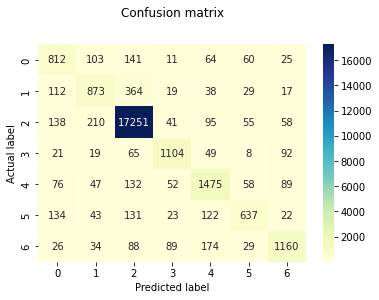

In [15]:
#let us get the predictions using the classifier we had fit above
y_pred = modelo_knn.predict(X_teste)
confusion_matrix(y_teste,y_pred)
pd.crosstab(y_teste, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

y_pred = modelo_knn.predict(X_teste)
c_matrix = confusion_matrix(y_teste, y_pred)
p = sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
print(classification_report(y_teste,y_pred))

                   precision    recall  f1-score   support

     Risco Alto I       0.62      0.67      0.64      1216
    Risco Alto II       0.66      0.60      0.63      1452
   Risco Alto III       0.95      0.97      0.96     17848
      Risco Baixo       0.82      0.81      0.82      1358
      Risco Médio       0.73      0.76      0.75      1929
 Risco Médio-Alto       0.73      0.57      0.64      1112
Risco Médio-Baixo       0.79      0.72      0.76      1600

         accuracy                           0.88     26515
        macro avg       0.76      0.73      0.74     26515
     weighted avg       0.88      0.88      0.88     26515



In [17]:
print("O score de eficiência do projeto é de ", accuracy_score(y_teste, y_pred))

O score de eficiência do projeto é de: 0.8792004525740147


# Conclusões

Observou-se que apesar do projeto apresentar uma grande eficiência, isso não significa necessariamente que os dados vão estar sempre corretos. A eficiência está alta devido os nossos dados de target de risco de fogo 1 apresentarem uma grande quantidade de dados, logo, o sistema está inclinado a chutar nos locais onde há mais números e